## 1. Vamos a cargar los datos y a analizarlos

In [6]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import joblib

import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.read_csv('../data/processed/valencia_norm.csv')

In [7]:
df_original.head().T

,0,1,2,3,4
Precio,111000.000000,169000.000000,162000.000000,199000.000000,73000.000000
Metros_Construidos,75.000000,128.000000,86.000000,111.000000,56.000000
Habitaciones,2.000000,4.000000,2.000000,4.000000,3.000000
Baños,1.000000,2.000000,1.000000,2.000000,1.000000
Terraza,1.000000,0.000000,0.000000,0.000000,1.000000
Ascensor,1.000000,1.000000,1.000000,1.000000,1.000000
Aire_Acondicionado,1.000000,1.000000,1.000000,0.000000,0.000000
Servicios,2.000000,3.000000,3.000000,3.000000,3.000000
Garaje,1.000000,1.000000,0.000000,0.000000,0.000000
Trastero,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33622 entries, 0 to 33621
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Precio              33622 non-null  float64
 1   Metros_Construidos  33622 non-null  int64  
 2   Habitaciones        33622 non-null  int64  
 3   Baños               33622 non-null  int64  
 4   Terraza             33622 non-null  int64  
 5   Ascensor            33622 non-null  int64  
 6   Aire_Acondicionado  33622 non-null  int64  
 7   Servicios           33622 non-null  int64  
 8   Garaje              33622 non-null  int64  
 9   Trastero            33622 non-null  int64  
 10  Armarios            33622 non-null  int64  
 11  Piscina             33622 non-null  int64  
 12  Conserje            33622 non-null  int64  
 13  Jardín              33622 non-null  int64  
 14  Duplex              33622 non-null  int64  
 15  Estudio             33622 non-null  int64  
 16  Átic

In [9]:
df_original.columns

Index(['Precio', 'Metros_Construidos', 'Habitaciones', 'Baños', 'Terraza',
       'Ascensor', 'Aire_Acondicionado', 'Servicios', 'Garaje', 'Trastero',
       'Armarios', 'Piscina', 'Conserje', 'Jardín', 'Duplex', 'Estudio',
       'Ático', 'Año_construcción', 'Calidad_suelo', 'Plantas_máximas',
       'Número_viviendas', 'Calidad_catastral', 'Distancia_centro',
       'Distancia_metro', 'Distancia_Blasco', 'Latitud', 'Longitud',
       'Orientación_Este', 'Orientación_Norte', 'Orientación_Oeste',
       'Orientación_Sur'],
      dtype='object')

In [10]:
df = df_original.copy()


In [11]:
df = df.drop(columns=['Preciom2'], axis=True)

KeyError: "['Preciom2'] not found in axis"

In [12]:
df.head().transpose()

,0,1,2,3,4
Precio,111000.000000,169000.000000,162000.000000,199000.000000,73000.000000
Metros_Construidos,75.000000,128.000000,86.000000,111.000000,56.000000
Habitaciones,2.000000,4.000000,2.000000,4.000000,3.000000
Baños,1.000000,2.000000,1.000000,2.000000,1.000000
Terraza,1.000000,0.000000,0.000000,0.000000,1.000000
Ascensor,1.000000,1.000000,1.000000,1.000000,1.000000
Aire_Acondicionado,1.000000,1.000000,1.000000,0.000000,0.000000
Servicios,2.000000,3.000000,3.000000,3.000000,3.000000
Garaje,1.000000,1.000000,0.000000,0.000000,0.000000
Trastero,0.000000,0.000000,0.000000,0.000000,0.000000


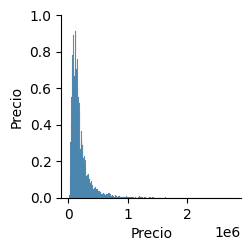

In [13]:

sns.pairplot(df[["Precio"]])

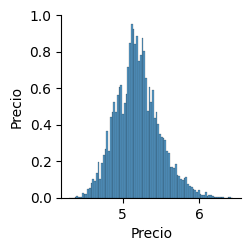

In [14]:
sns.pairplot(np.log10(df[["Precio"]]))

In [15]:
df.to_csv('../data/processed/valencia_norm.csv', index=False)

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [28]:
X,y = df.drop(["Precio"], axis=1), df["Precio"]

In [29]:
X.shape

(33622, 30)

In [30]:
y.shape

(33622,)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [32]:
# Definir preprocesamiento de columnas numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [33]:
# Definir el pipeline con los modelos a probar
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])


In [34]:
# Definir los parámetros para GridSearchCV
param_grid = [
    {
        'model': [LinearRegression()]
    },
    {
        'model': [Ridge()],
        'model__alpha': [0.1, 1.0, 10.0]
    },
    {
        'model': [Lasso()],
        'model__alpha': [0.1, 1.0, 10.0]
    },
    {
        'model': [ElasticNet()],
        'model__alpha': [0.1, 1.0, 10.0],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    },
    {
        'model': [RandomForestRegressor(random_state=42)],
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20, 30]
    },
    {
        'model': [GradientBoostingRegressor(random_state=42)],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    },
    {
        'model': [XGBRegressor(random_state=42)],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    },
    {
        'model': [SVR()],
        'model__C': [0.1, 1.0, 10.0],
        'model__epsilon': [0.1, 0.2, 0.5],
        'model__kernel': ['linear', 'rbf']
    }
]

In [35]:
# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


/Users/cescrosello/miniconda3/envs/ml_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Metros_Construidos', 'Habitaciones', 'Baños', 'Terraza', 'Ascensor',
       'Aire_Acondicionado', 'Servicios', 'Garaje', 'Trastero', 'Armarios',
       'Piscina', 'Conserje', 'Ja...
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...)],
                          'model__learning_rate': [0.01, 0.1, 0.2],
                          'model__max_depth': [3, 5, 7],
                          'model__n_estimators': [100, 200]},
                         {'model': [SVR()], 'model__C': [0.1, 1.0, 10.0],
                          'model__epsilon': [0.1, 0.2, 0.5],
                          'model__kernel': ['linear', 'rbf']}],
             scoring='neg_mean_squared_error')

In [36]:
# Obtener los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_


In [37]:
# Predecir y evaluar con el mejor modelo encontrado
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor Modelo: {grid_search.best_params_}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

Mejor Modelo: {'model': RandomForestRegressor(random_state=42), 'model__max_depth': 30, 'model__n_estimators': 200}
RMSE: 54109.07002869494
MAE: 25316.88850216816
R^2: 0.9014436576124158


## INTEPRETACIÓN DEL MODELO


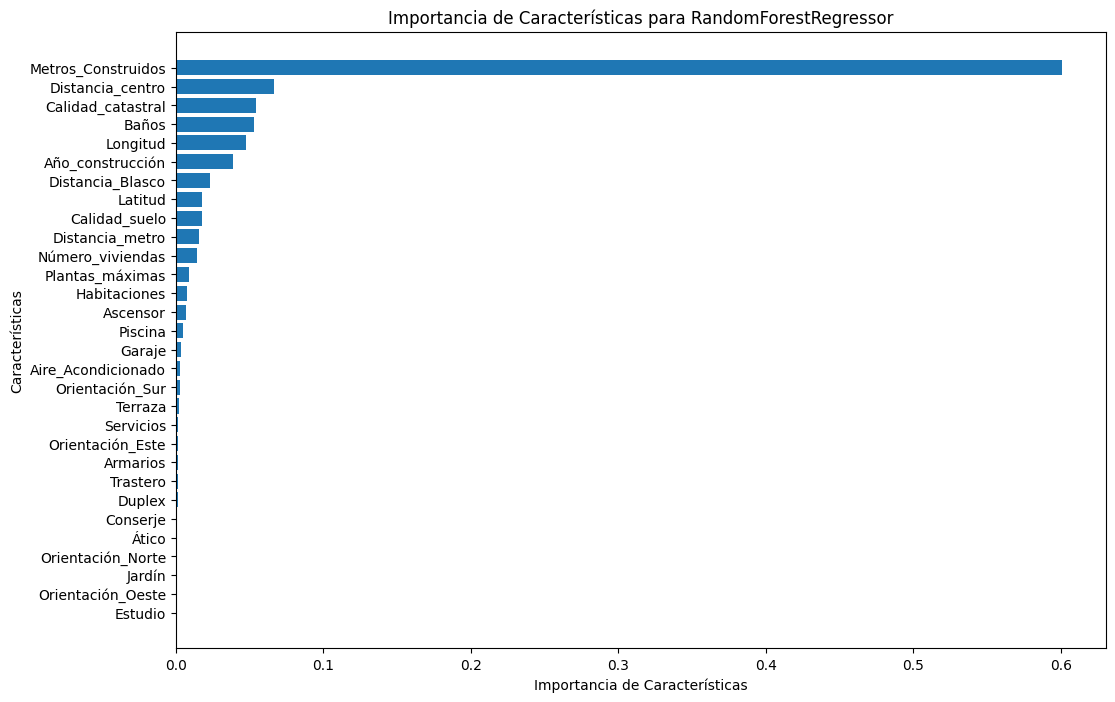

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Extraer importancia de características
feature_importances = best_model.named_steps['model'].feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar importancia de características
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia de Características')
plt.ylabel('Características')
plt.title('Importancia de Características para RandomForestRegressor')
plt.gca().invert_yaxis()
plt.show()

## Ajuste de hiperparametros

In [46]:
# Definir el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(random_state=42))])

# Definir el nuevo rango de hiperparámetros
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

In [47]:
# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=  10.5s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=  10.5s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=  10.6s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=  10.6s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=  10.7s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=  21.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=  21.0s
[CV] END model__max_depth=10, model

/Users/cescrosello/miniconda3/envs/ml_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=  40.8s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=  41.3s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=  40.9s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=  41.4s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=  52.2s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=  51.4s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=  52.4s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_est

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Metros_Construidos', 'Habitaciones', 'Baños', 'Terraza', 'Ascensor',
       'Aire_Acondicionado', 'Servicios', 'Garaje', 'Trastero', 'Armarios',
       'Piscina', 'Conserje', 'Ja...
       'Distancia_metro', 'Distancia_Blasco', 'Latitud', 'Longitud',
       'Orientación_Este', 'Orientación_Norte', 'Orientación_Oeste',
       'Orientación_Sur'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20, 30],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [48]:
# Obtener el mejor modelo y sus parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [49]:
# Imprimir los mejores hiperparámetros
print("Mejores Hiperparámetros: ", best_params)

Mejores Hiperparámetros:  {'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}


In [50]:
# Predecir y evaluar con el mejor modelo encontrado
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor Modelo: {grid_search.best_params_}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

Mejor Modelo: {'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}
RMSE: 54034.23334258256
MAE: 25258.194049050737
R2: 0.9017160899253599


## Corss Validation
La validación cruzada es importante para asegurarnos de que nuestro modelo no está sobreajustado y que se generaliza bien a datos no vistos. Usaremos cross_val_score para evaluar el rendimiento del modelo en múltiples particiones del conjunto de datos de entrenamiento.

In [52]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f'RMSE de validación cruzada: {cv_rmse_scores}')
print(f'RMSE promedio: {cv_rmse_scores.mean()}')

RMSE de validación cruzada: [56030.51769534 60483.02198871 54596.42983601 66560.84807373
 57402.45974063]
RMSE promedio: 59014.65546688587


## DESPLIEGUE DEL MODELO Y PRUEBA DE PREDICCION

In [54]:
import joblib

# Guardar el modelo
joblib.dump(best_model, 'best_random_forest_model.pkl')

# Cargar el modelo
loaded_model = joblib.load('best_random_forest_model.pkl')

# Supongamos que tenemos nuevos datos para predecir
nuevos_datos = pd.DataFrame({
    # Datos de ejemplo
    'Metros_Construidos': [85, 100],
    'Habitaciones': [3, 4],
    'Baños': [2, 1],
    'Terraza': [0, 1],
    'Ascensor': [1, 1],
    'Aire_Acondicionado': [0, 1],
    'Servicios': [2, 3],
    'Garaje': [1, 0],
    'Trastero': [0, 0],
    'Armarios': [1, 1],
    'Piscina': [0, 1],
    'Conserje': [0, 0],
    'Jardín': [0, 1],
    'Duplex': [0, 0],
    'Estudio': [0, 0],
    'Ático': [0, 0],
    'Año_construcción': [1990, 2000],
    'Calidad_suelo': [4, 5],
    'Plantas_máximas': [6, 8],
    'Número_viviendas': [20, 30],
    'Calidad_catastral': [6, 7],
    'Distancia_centro': [2.5, 3.0],
    'Distancia_metro': [0.5, 0.3],
    'Distancia_Blasco': [1.2, 2.1],
    'Latitud': [39.48, 39.50],
    'Longitud': [-0.36, -0.38],
    'Orientación_Este': [0, 1],
    'Orientación_Norte': [0, 0],
    'Orientación_Oeste': [0, 0],
    'Orientación_Sur': [1, 0]
})

# Predecir con el modelo cargado
new_predictions = loaded_model.predict(nuevos_datos)
print(new_predictions)


[198953.33333333 176476.66666667]
